In [31]:
%matplotlib inline

# Importer les bibliothèques utiles pour le travail Pratique

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

### Signal sinusoïdal, combinaison de sinus

# PARTIE 1

### Signal aléatoire

##### 1. Sin ou cos : Définissez un signal sinusoïdal ou cosinus de 2Hz entre les instants 0 et 10, avec un pas de 0.1, affichez sa représentation temporelle.

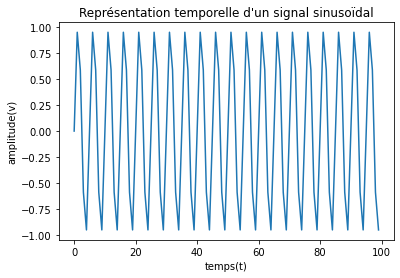

In [178]:
Fe=2
t= np.arange(0,10,(0.1))
s=np.sin(2*np.pi*Fe*t) #
plt.title("Représentation temporelle d'un signal sinusoïdal")
plt.xlabel("temps(t)")
plt.ylabel("amplitude(v)")
plt.plot(s)

on voit lisiblement que notre signal sinusoïdale est périodique.

##### Affichez son spectre d'amplitude

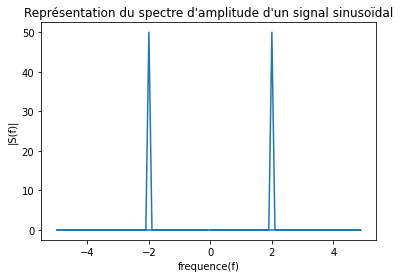

In [179]:
from scipy import fftpack
import matplotlib.pyplot as plt
fe = 10 #correspond au pas de 0.1
X = fftpack.fft(s)
freqs = fftpack.fftfreq(len(s)) * fe
plt.title("Représentation du spectre d'amplitude d'un signal sinusoïdal")
plt.xlabel("frequence(f)")
plt.ylabel("|S(f)|")
plt.plot(freqs, np.abs(X))

Le signal sinusoïdale possède des spectres d'amplitudes (fréquentielle ou TDF) ayant une allure propres,ici, ce dernier est représenté par 2 pics. Alors retenonspour info que plus la fréquence est basse, plus la période est grande et plus, les rayes des spectres d'amplitudes sont petis.

##### Faites varier sa fréquence

🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕
Nous vous demandons de patienter un moment avant que notre executeur ne se lance
lisez attentivement le texte ci-dessous
*********************************************************************************
Voici la petite valeur ajouté que nous apportons à ce travail 🥰
une animation pour la représentation d'un signal sinus lors de la variation de notre fréquence :
appuyer sur play avant |> pour faire démarrer l'éxecuteur de signal, play arrière <| pour revenir, - pour réduire la vitesse,  + pour augmenter la vitesse du signal, || pause pour stoper.
*********************************************************************************
Merci 😉


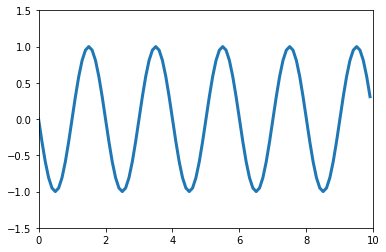

In [32]:
##########################Variation de la fréquence de 0 à 100##############################
fig, ax = plt.subplots()

ax.set_xlim(( 0, 10))
ax.set_ylim((-1.5, 1.5))

line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return (line,)

def animate_sin(frame):
    t= np.arange(0,10,(0.1))
    s=np.sin(t*2*np.pi*frame/2)
    #s=np.sin(t)
    line.set_data(t,s)

anim = FuncAnimation(fig,animate_sin,init_func=init,frames=100,interval=10,blit=False)
#video = anim.to_jshtml() 
print("🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕🆕")
print("Nous vous demandons de patienter un moment avant que notre executeur ne se lance")
print("lisez attentivement le texte ci-dessous")
print("*********************************************************************************")
print("Voici la petite valeur ajouté que nous apportons à ce travail 🥰")
print("une animation pour la représentation d'un signal sinus lors de la variation de notre fréquence :")
print("appuyer sur play avant |> pour faire démarrer l'éxecuteur de signal, play arrière <| pour revenir, - pour réduire la vitesse," 
      + "  + pour augmenter la vitesse du signal, || pause pour stoper.")
print("*********************************************************************************")
print("Merci 😉")
HTML(anim.to_jshtml())
#############################################################################

##### 2. Composition de sinus pour former un signal périodique : Formez le signal ci-dessous. On affichera le résultat au fur et à mesure de l'ajout des termes en sinus. On pourra s'arrêter à l'ordre 20 par exemple. Quel signal a-t-on ainsi reconstitué ?

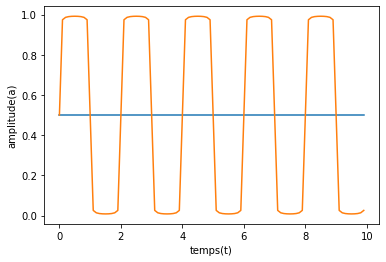

In [29]:
def F(t):
    tab=np.ones(t.shape)*0.5
    plt.plot(t,tab)
    for p in range(20):
        tab=((2/(np.pi*(2*p+1)))*np.sin(2*np.pi*(2*p+1)*0.5*t))+tab
    plt.plot(t,tab)
    plt.xlabel("temps(t)")
    plt.ylabel("amplitude(a)")
    
t= np.arange(0,10,0.1)
F(t)

Nous savons que quelques soit la période ou la nature d'un signal, à partir du moment où un signal est dit périodique, ce dernier peut se décomposer comme une somme infinie de fonction sinusoïdal et c'est de celà donc qu'il s'agit d'aborder le principe des séries de Fourier : la Transformée de Fourier est aux signaux ce que le triangle de pascal est à la pyramide de pascale.

#### 3.Génération d’un signal aléatoire : Générer et tracer un signal aléatoire constitué de 1000 échantillons. Remarquez que la distribution des amplitudes de ses échantillons peut être uniforme ou normale. Quelle est la différence entre ces 2 distributions ?

In [31]:
N=1000

#### Uniforme

Text(0, 0.5, 'amplitude(a)')

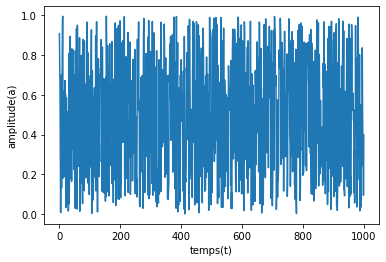

In [35]:
t=np.random.rand(N)
plt.plot(range(N),t)
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")

On sait que la loi uniforme, uniformise les échantillons tirés aléatoirement, c'est à dire qu'on doit veiller à ce que la densité soit égale à 1.

#### Normale

Text(0, 0.5, 'amplitude(a)')

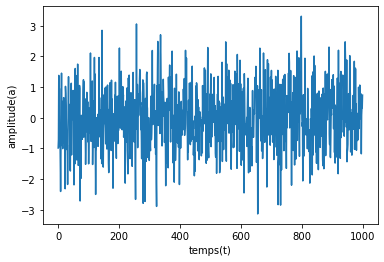

In [8]:
t=np.random.randn(N)
plt.plot(range(N),t)
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")

nous avons généré des échantillons qui suivent une distributions normale d'où même la présence des valeurs négatives.

### Différence entre les deux distributions :

     la diffférence entre ces deux distributions se situe au niveaux des valeurs, dans la distribution uniforme les 1000 échantillons varient de 0 à 1 alors que la distribution normale on a des valeurs suivant une distribution gaussienne échnatillon<=0 et échantillon>=1.

### Etude de signaux réels

##### 1) ci-dessous, le signal issu d'un capteur gyroscopique d'un nageur

In [5]:
import scipy.io as sio
mat_contents = sio.loadmat("angle_CD6.mat")
print(mat_contents)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Mar  7 18:30:52 2016', '__version__': '1.0', '__globals__': [], 'angle_CD': array([[ 99.92027908],
       [100.29864512],
       [100.73978423],
       ...,
       [ 98.66690673],
       [ 98.60161616],
       [ 98.45900821]])}


In [133]:
data_nageur = mat_contents["angle_CD"]
print(data_nageur)

[[ 99.92027908]
 [100.29864512]
 [100.73978423]
 ...
 [ 98.66690673]
 [ 98.60161616]
 [ 98.45900821]]


ci-haut nous récupérons les valeurs du signal 

ci-dessous nous affichons le signale du capteur gyroscopique du nageur

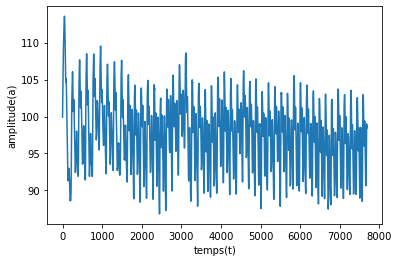

In [134]:
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")
plt.plot(data_nageur)
plt.show()

le signale renvoyé par le capteur gyroscopique du nageur est un signal à énergie infinie (non convergent) de type aléatoire. En effet, le comportement temporel de ce signale est imprévisible, on ne peut donc pas le décrire mathématiquement ou prévoir comment il se présentera à l'instant t+1. On pourrait alors par exemple s'intéresser à la quantité d'énergie transférée en moyenne et par unité de temps.

#####  2) ci-dessous, le signal biologique qui est un ECG

In [6]:
mat_contents2 = sio.loadmat("ecgdemodata2.mat")
print(mat_contents2)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Feb 19 10:29:12 2003', '__version__': '1.0', '__globals__': [], 'ecg': array([[2284, 2279, 2286, ..., 2132, 2178, 2223]], dtype=uint16), 'samplingrate': array([[1000]], dtype=uint16)}


nous venons de ressortir les entêtes du signale biolgique

[[2284 2279 2286 ... 2132 2178 2223]]


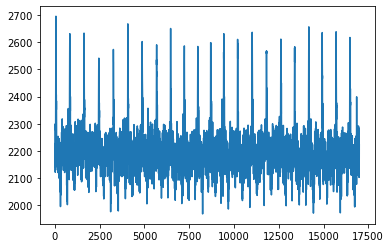

In [38]:
data_ecg = mat_contents2["ecg"] #récupération d'un champ
print(data_ecg)
plt.plot(data_ecg[0])
plt.show()

par cette image, nous osons dire que le signal biologique de l'ECG est stochastique (stationnaire) et bruité ou avec des parasites car caréctérisé par des invariants au cours du temps, ils gênent à la perception du signal et donc peut se traiter par utilisation d'outil statistique.

In [35]:
from IPython.display import Audio
#Ici je joue le son du batement cardiaque
Audio(data_ecg[0], rate = 3000)

##### 3) Nous nous intéressons à présent au son du piano

In [21]:
from scipy.io import wavfile as wav
fe_wav, data_wav = wav.read("piano.wav")
print(data_wav)

[  811   811  1081 ... -3243 -2973 -2973]


In [139]:
print(fe_wav)

22050


ci-dessous, nous représentons temporellement le signal du son du piano

Text(0, 0.5, 'amplitude(a)')

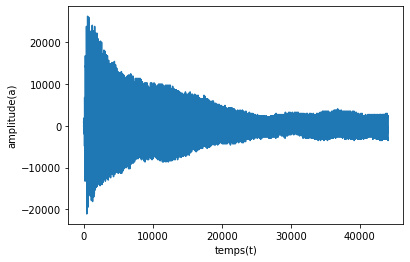

In [22]:
plt.plot(data_wav)
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")

Le signale du son du piano est un signale apériodique ou  non périodique de la catégorie des signaux déterministes, un tout petit peu comme la parole qui appartient à la catégorie des signaux aléatoire de type non stationnaire, ce signale du piano a une tendance qui varie au grès d'une information transmise.

In [36]:
from IPython.display import Audio
#Ici je joue le son du piano
Audio(data_wav, rate = 22174)

#### Maintenant que nous avons tracé la repréentation temporelle des différents signaux à l'aide de leur fréquence d'échantillonage respective, nous allons nous intérésser au traçage de l'histogramme des valeurs de ces mêms signaux.

###### 1) Observation de l'histogramme et des paramètres de tendances centrales du  signal issu du capteur gyroscopique du nageur

(array([ 282.,  928., 1114., 1241., 1787., 1287.,  753.,  208.,   54.,
         31.]), array([ 86.81939923,  89.49491336,  92.17042748,  94.8459416 ,
        97.52145573, 100.19696985, 102.87248397, 105.5479981 ,
       108.22351222, 110.89902634, 113.57454047]), <BarContainer object of 10 artists>)


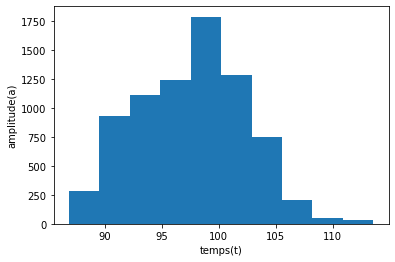

In [137]:
h=plt.hist(data_nageur, bins=10)
print(h)
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")
plt.show()

étant donnée que de base ce signal n'est pas aussi simple à interpréter, prendre très peu de bin nous permet de mieux analyser sa distribution. Ainsi, je dirai que la distribution du signal émis par le capteur gyroscopique du nageur se rapproche un peu d'une gaussienne à la différence que celui-ci est asymétrique à gauche c'est à dire que les petites valeurs observées sont plus fréquentes que les valeurs plus élevées, pour preuve, nous allons démontrer ci-dessous que la moyenne et la médianne ne sont pas similaire et par conséquent, on peut les distinguer afin d'en déduire que, la distribution est réellmeent non symétrique.

In [129]:
med=np.median(data_nageur)
print("la médiane est de  : "+str(med))

la médiane est de  : 97.96499157785406


In [130]:
mean=np.mean(data_nageur)
print("en moyenne, le capteur gyroscopique du nageur perçoit émet la valeur de : "+str(mean))

en moyenne, le capteur gyroscopique du nageur perçoit émet la valeur de : 97.5911503544951


la moyenne étant différente de la médiane, il y a réellement disymétrie.

In [100]:
var=np.var(data_nageur)
print("la variance du signal est : "+str(var))

la variance du signal est : 22.55919626637978


On sait que plus la variance est élevée, plus les données (valeurs de notre signal) sont dispersées, La variance mesure le degré de dispersion des valeurs du signal autour de leur moyenne. sa racine carrée nous donne l'écart-type de. Ainsi le degré de dispersion des valeurs de notre signal est de 22,5.

Nous avons compris que, une variation qui est aléatoire ou naturelle pour un signal est souvent appelée un bruit ou parasite et donc, sachant que la moyenne ne traduit pas toujours la réalité l'écart type peut également servir à établir une référence pour estimer la variation globale du signal qui est de  ici de 22,5.

In [144]:
std_=np.std(data_nageur)
print("l'écart-type du signal retransmis est : "+str(std_))

l'écart-type du signal retransmis est : 4.749652225835043


In [103]:
min_=np.min(data_nageur)
print("le minimum du signal est : "+str(min_))

le minimum du signal est : 86.81939923149042


In [131]:
max_=np.max(data_nageur)
print("la valeur maximum du signal retransmis est : "+str(max_))

la valeur maximum du signal retransmis est : 113.57454046721817


###### 2) Observation de l'histogramme et des paramètres de tendances centrales du signal de l'ECG

(array([ 148., 1549., 6282., 6957., 1115.,  390.,  193.,  175.,  161.,
         29.]), array([1969. , 2041.6, 2114.2, 2186.8, 2259.4, 2332. , 2404.6, 2477.2,
       2549.8, 2622.4, 2695. ]), <BarContainer object of 10 artists>)


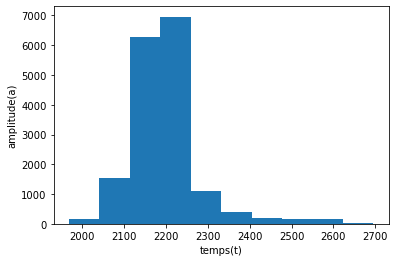

In [184]:
h=plt.hist(data_ecg[0], bins=10)
print(h)
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")
plt.show()

étant donnée que de base ce signal n'est pas aussi simple à interpréter, prendre très peu de bin nous permet de mieux analyser sa distribution. Ainsi, je dirai que la distribution du signal émis par l'ecg se rapproche un peu d'une gaussienne à la différence que celui-ci est asymétrique à gauche c'est à dire que les petites valeurs observées sont plus fréquentes que les valeurs plus élevées, pour preuve, nous allons démontrer ci-dessous que la moyenne et la médianne ne sont pas similaire et par conséquent, on peut les distinguer afin d'en déduire que, la distribution est réellmeent non symétrique.

In [185]:
med=np.median(data_ecg[0])
print("la médiane est de  : "+str(med))

la médiane est de  : 2190.0


In [186]:
mean=np.mean(data_ecg[0])
print("en moyenne, le capteur gyroscopique du nageur perçoit émet la valeur de : "+str(mean))

en moyenne, le capteur gyroscopique du nageur perçoit émet la valeur de : 2198.7655744455556


la moyenne étant différente de la médiane, il y a réellement disymétrie.

In [156]:
var=np.var(data_ecg[0])
print("la variance du signal est : "+str(var))

la variance du signal est : 7021.887453036386


On sait que plus la variance est élevée, plus les données (valeurs de notre signal) sont dispersées, La variance mesure le degré de dispersion des valeurs du signal autour de leur moyenne. sa racine carrée nous donne l'écart-type de. Ainsi le degré de dispersion des valeurs de notre signal est de 22,5.

Nous avons compris que, une variation qui est aléatoire ou naturelle pour un signal est souvent appelée un bruit ou parasite et donc, sachant que la moyenne ne traduit pas toujours la réalité l'écart type peut également servir à établir une référence pour estimer la variation globale du signal qui est de  ici de 22,5.

In [157]:
std_=np.std(data_ecg[0])
print("l'écart-type du signal retransmis est : "+str(std_))

l'écart-type du signal retransmis est : 83.79670311555454


In [158]:
min_=np.min(data_ecg[0])
print("le minimum du signal est : "+str(min_))

le minimum du signal est : 1969


In [159]:
max_=np.max(data_ecg[0])
print("la valeur maximum du signal retransmis est : "+str(max_))

la valeur maximum du signal retransmis est : 2695


###### 3) Observation de l'histogramme et des paramètres de tendances centrales du signal du son du piano

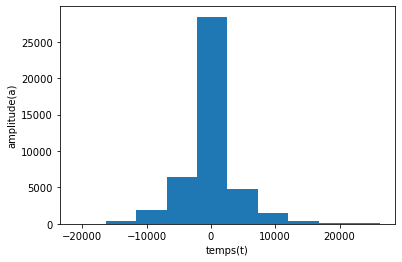

In [187]:
plt.hist(data_wav, bins=10)
plt.xlabel("temps(t)")
plt.ylabel("amplitude(a)")
plt.show()

In [6]:
mean=np.mean(data_wav)
print(mean)

0.5044671201814059


In [8]:
med=np.median(data_wav)
print(med)

0.0


In [9]:
min=np.min(data_wav)
print(min)

-21080


In [202]:
max=np.max(data_wav)
print(max)

26214


In [10]:
var=np.var(data_wav)
print(var)

17893015.385943763


In [12]:
std=np.std(data_wav)
print(std)

4230.013638978457


Nous avons compris que, une variation qui est aléatoire ou naturelle pour un signal est souvent appelée un bruit ou parasite et donc, sachant que la moyenne ne traduit pas toujours la réalité l'écart type peut servir à établir une référence plus au moins fiable pour estimer la variation globale du signal, de ce fait sachant que plus la variance est élevée, plus les données (valeurs de notre signal) sont dispersées, pour le son du piano, la variance vaut 17893015,38 cette variance mesure le degré de dispersion des valeurs du signal autour de leur moyenne de 0,50. sa racine carrée nous donne l'écart-type de 4230,01.

Je dirai que la distribution du signal émis par le piano se rapproche un peu d'une gaussienne et, celui-ci disymétrique car asymétrique à gauche c'est à dire que les petites valeurs observées sont plus fréquentes que les valeurs plus élevées, pour preuve, nous avons démontré ci-dessus que la moyenne et la médianne ne sont pas similaire et par conséquent, on peut les distinguer afin d'en déduire que, la distribution est réellmeent non symétrique.

###### Pour le signal audio toujours (optionnel) :  trouver la note joué

In [37]:
from IPython.display import Audio
#Ici je joue le son du piano
Audio(data_wav, rate = 22174)

- Numéro de touche : 77
- MIDI : C#6 ou E|,6
- latine : Do6#
- anglo-allemande : cis'''
- Fréquence (Hz) : 221746

###### Pour le signal audio :  Calculer et afficher le spectre d’amplitude de ce signal. Déterminer la fréquence fondamentale dans le spectre, et les fréquences des harmoniques.

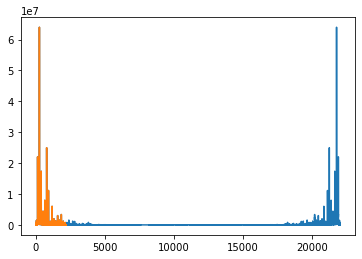

In [25]:
#fe : fréquence d'échantillonnage
#N : longueur du signal original
N = len(data_wav)
f = np.linspace(0,fe_wav,N)

a = np.abs(np.fft.fft(data_wav)) #spectre du signal à calculer en utilisant np.fft.fft()
#f = np.fft.fftfreq(freq.shape[-1])

#affichage du spectre entier :
plt.plot(f,a)

taille = int(N/10)

#affichage des premières fréquences uniquement :
plt.plot(f[:taille],a[:taille])

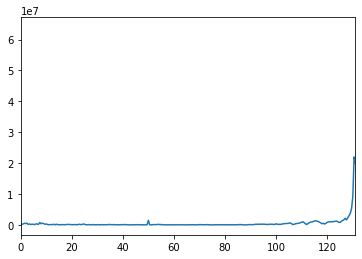

In [26]:
plt.plot(f[:taille],a[:taille])
plt.xlim(0,131)
plt.show()

ci dessous, nous déterminons la fréquence fondamentale dans le spectre, et les fréquences des harmoniques

In [27]:
print("la fondamentale est : "+str(a[131])+" Hz")

la fondamentale est : 35138.14321206543 Hz


In [28]:
print("la première harmonique est : "+str(a[132])+" Hz")

la première harmonique est : 22143.50057226849 Hz


In [29]:
print("la deuxième harmonique est : "+str(a[133])+" Hz")

la deuxième harmonique est : 32683.520981061687 Hz


###### toutes les autres harmoniques

In [30]:
level = 134
for harmonique in a[134:taille]:
    print("l'harmonique "+str(level)+" est : "+str(harmonique))
    level+=1

l'harmonique 134 est : 77701.4172843702
l'harmonique 135 est : 61330.41164117894
l'harmonique 136 est : 37260.59488056483
l'harmonique 137 est : 16519.2084718503
l'harmonique 138 est : 27914.21981367013
l'harmonique 139 est : 66991.86061891854
l'harmonique 140 est : 94976.76629823922
l'harmonique 141 est : 93196.04891722296
l'harmonique 142 est : 48524.64174045204
l'harmonique 143 est : 48461.456774544844
l'harmonique 144 est : 33924.78875583906
l'harmonique 145 est : 66816.41096553399
l'harmonique 146 est : 84413.36167599879
l'harmonique 147 est : 45940.787500746024
l'harmonique 148 est : 27712.125948475885
l'harmonique 149 est : 12137.091591714006
l'harmonique 150 est : 6938.338070607501
l'harmonique 151 est : 38477.040684939835
l'harmonique 152 est : 59338.694193549796
l'harmonique 153 est : 27426.44345545385
l'harmonique 154 est : 58234.3254592046
l'harmonique 155 est : 51827.503735460705
l'harmonique 156 est : 55113.59534790882
l'harmonique 157 est : 68327.29866247508
l'harmonique

l'harmonique 3503 est : 62595.85623599625
l'harmonique 3504 est : 54428.05201913126
l'harmonique 3505 est : 43875.30890530247
l'harmonique 3506 est : 52367.1958251148
l'harmonique 3507 est : 73156.29049549704
l'harmonique 3508 est : 40258.94925661649
l'harmonique 3509 est : 43297.00764525713
l'harmonique 3510 est : 51856.12171831115
l'harmonique 3511 est : 74443.34868450087
l'harmonique 3512 est : 55367.524443463066
l'harmonique 3513 est : 50936.85217866726
l'harmonique 3514 est : 53501.56754910301
l'harmonique 3515 est : 53480.34150722366
l'harmonique 3516 est : 70137.30426952713
l'harmonique 3517 est : 64347.11647916572
l'harmonique 3518 est : 95720.48842690917
l'harmonique 3519 est : 22474.38178395245
l'harmonique 3520 est : 20639.01083292359
l'harmonique 3521 est : 49218.75025054389
l'harmonique 3522 est : 46312.18800807656
l'harmonique 3523 est : 55956.95486218209
l'harmonique 3524 est : 47981.092327936945
l'harmonique 3525 est : 46789.9050938024
l'harmonique 3526 est : 22014.1167

###### Pour le signal ECG : Calculer et afficher le spectre d’amplitude de ce signal. Calculer le rythme cardiaque du patient.

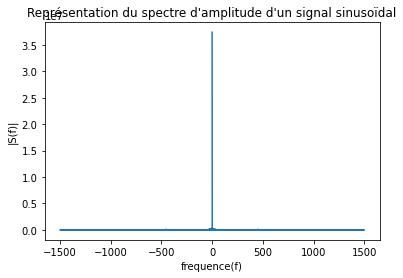

In [15]:
from scipy import fftpack
import matplotlib.pyplot as plt
fe = 3000 #correspond au pas de 0.1
X = fftpack.fft(data_ecg[0])
freqs = fftpack.fftfreq(len(data_ecg[0])) * fe
plt.title("Représentation du spectre d'amplitude d'un signal sinusoïdal")
plt.xlabel("frequence(f)")
plt.ylabel("|S(f)|")
plt.plot(freqs, np.abs(X))

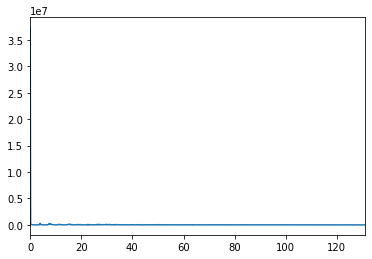

In [11]:
plt.plot(f[:taille],a[:taille])
plt.xlim(0,131)
plt.show()

ci dessous, nous déterminons la fréquence fondamentale dans le spectre, et les fréquences des harmoniques

##### Je me permets ici de m'amuser un peu en affichant les 2000 premières harmoniques du signal

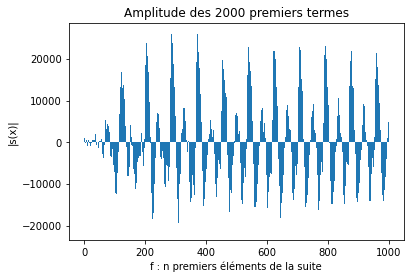

In [392]:
n = 2000
plt.bar(f[:n],data_wav[:n])
plt.title("Amplitude des 2000 premiers termes")
plt.xlabel("f : n premiers éléments de la suite")
plt.ylabel("|s(x)|")
plt.show()

# PARTIE 2

#### INTERPOLATION

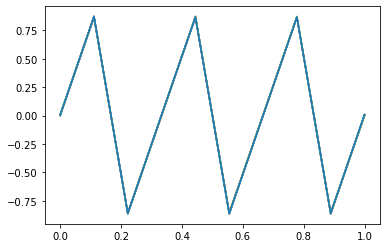

In [116]:
#### SIGNAL BRUITE

import random
import math

def signal(t):
    return np.sin(2*np.pi*3*t)

def aleaGauss(sigma):
    bruit = np.random.rand(10)*0.1
    return sigma*np.sin(2*np.pi*3+bruit)

N=10
T = 2
t= np.linspace(0,1,10)
sigma = 0.1
y=np.zeros((N,N))
for k in range(N):
    y[k] = signal(t[k])+aleaGauss(sigma)    
plt.plot(t,signal(t))
plt.plot(t,y)
plt.show()

In [99]:
from scipy.interpolate import interp1d

In [104]:
def interpolate():
    signal=np.sin(2*np.pi*3*t)
    Algo_interp=['nearest','linear','cubic']
    plt.plot(t,signal)
    for algo in Algo_interp:
        f=interp1d(t,signal,kind=algo)
        xnew=np.arange(0,1,50)
        ynew = f(xnew)
        plt.plot(t,signal,'o',xnew,ynew,'-')
        plt.show()

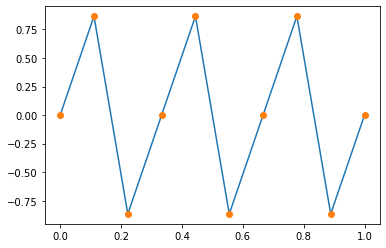

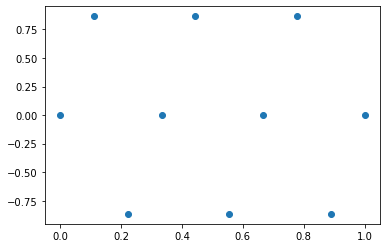

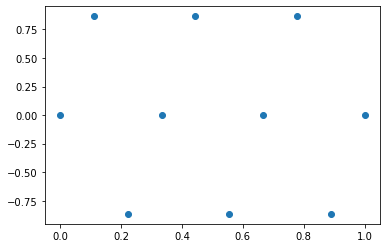

In [105]:
interpolate()

#### Fenêtre temporel - Influence sur le calcul de la TRansformé de Fourier

#### Exercice 1 : Propriétés des fenêtres

In [40]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
mywindow = np.linspace(0.5,0.5,51)
response = 20 * np.log10(np.abs(fftshift(fft(mywindow, 2048))))

In [42]:
response

array([-6.02059991, -6.04719744, -6.12731805, ..., -6.26196223,
       -6.12731805, -6.04719744])

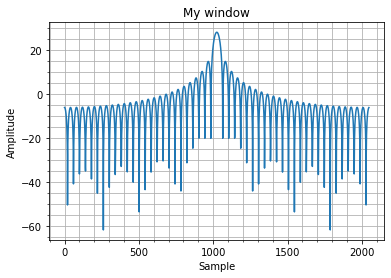

In [43]:
plt.title("My window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(response)
plt.grid(True,which='both')
plt.minorticks_on()
plt.show()

<ipython-input-44-1027c764540e>:14: RuntimeWarning: divide by zero encountered in log10
  responser = 20 * np.log10(np.abs(fftshift(A/abs(A).max())))


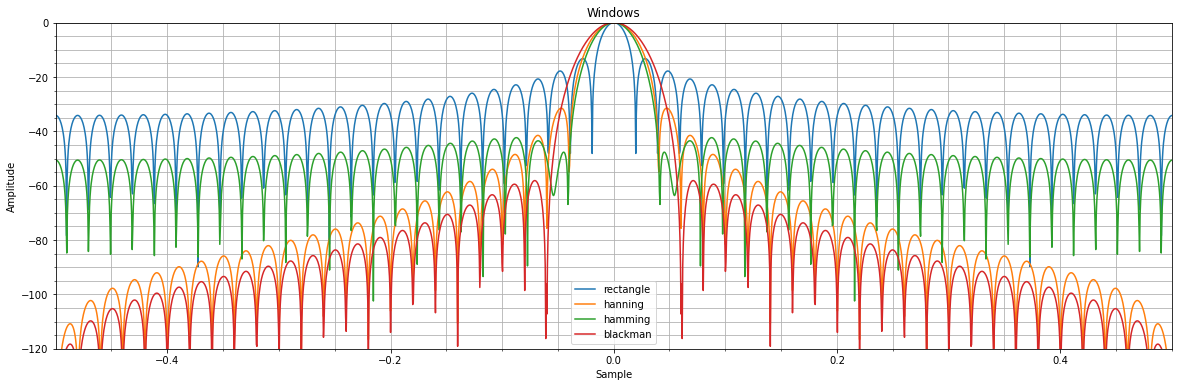

In [44]:
plt.figure(figsize=(20,6))


window = signal.windows.boxcar(51)
A=fft(window, 2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20 * np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response, label="rectangle")


han = signal.windows.hann(51)
A=fft(han, 2014)/(len(han)/2.0)
mywindowr = np.linspace(-0.5,0.5,len(A))
responser = 20 * np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(mywindowr,responser,label="hanning")
plt.axis([-0.5,0.5,-120,0])



ham = signal.windows.hamming(51)
A=fft(ham, 2014)/(len(ham)/2.0)
mywindowr = np.linspace(-0.5,0.5,len(A))
responser = 20 * np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(mywindowr,responser,label="hamming")
plt.axis([-0.5,0.5,-120,0])


black = signal.windows.blackman(51)
A=fft(black, 2014)/(len(ham)/2.0)
mywindowr = np.linspace(-0.5,0.5,len(A))
responser = 20 * np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(mywindowr,responser,label="blackman")
plt.axis([-0.5,0.5,-120,0])


plt.title("Windows")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.legend(loc="lower center")
plt.grid(True,which='both')
plt.minorticks_on()
plt.show()

Ci-haut, j'ai généré des fenêtres sur 51 points et son spectre calculé avec une FFT sur 2048 points et ensuite, j'ai affiché le spectre en dB du signal.

#### Compléter le tableau suivant :.

In [311]:
pd.DataFrame({"Fenêtre":["Rectangle","Hanning","Hamming","Blackman"],"Largeur du lobe principal, exprimé en fonction de N":[0.04,0.08,0.08,0.12],"Atténuation en dB (approximative sur la figure)":[15,35,50,55]})

Fenêtre  Largeur du lobe principal, exprimé en fonction de N  \
0  Rectangle                                               0.04     
1    Hanning                                               0.08     
2    Hamming                                               0.08     
3   Blackman                                               0.12     

   Atténuation en dB (approximative sur la figure)  
0                                               15  
1                                               35  
2                                               50  
3                                               55

en conclusion, la meilleure fenêtre en terme de largeur du lobe principal est : la fenêtre Rectangle et, la meilleur fenêtre en terme d'atténuation en dB est : la fenêtre Blackman.

### Exercice 2 : Influence différentes fenêtres sur la résolution fréquentielle de la TFD obtenue

In [291]:
A=1
#
t1= np.linspace(0,1,1000)
t2=np.linspace(0,1,512)
x=A*np.sin(2*np.pi*130*t1)
y=A*np.sin(2*np.pi*150*t1)
s=2*(x+y)

In [319]:
def transformation(longueur):
    plt.figure(figsize=(20,6))
    #
    r=signal.boxcar(longueur)
    hn=signal.hann(longueur)
    hm=signal.hamming(longueur)
    b=signal.blackman(longueur)
    #    
    fig, sb=plt.subplots(4,1,sharey=True)
    #
    response_r=20*np.log(np.abs(fftshift(fft(r*s[:longueur],512))))
    sb[0].plot(t2,response_r,label="rectangle")
    #
    response_hn=20*np.log(np.abs(fftshift(fft(hn*s[:longueur],512))))
    sb[1].plot(t2,response_hn,label="haning")    
    #
    response_hm=20*np.log(np.abs(fftshift(fft(hm*s[:longueur],512))))
    sb[2].plot(t2,response_hm,label="hamming")
    #
    response_b=20*np.log(np.abs(fftshift(fft(b*s[:longueur],512))))
    sb[3].plot(t2,response_b,label="blackman")
    #
    plt.legend(loc="lower center")
    plt.show()

<Figure size 1440x432 with 0 Axes>

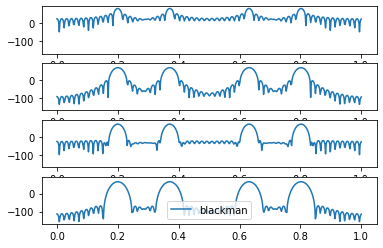

In [320]:
transformation(64)

<Figure size 1440x432 with 0 Axes>

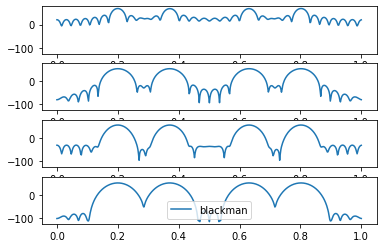

In [314]:
transformation(32)

### Exercice 3 : Influence des différentes fenêtres sur la résolution en amplitude de la TFD obtenue

In [302]:
A=1
#
t1= np.linspace(0,1,1000)
t2=np.linspace(0,1,512)
x=A*np.sin(2*np.pi*130*t1)
y=A*np.sin(2*np.pi*300*t1)
s=2*(x+y)

In [322]:
def transformation(longueur):
    plt.figure(figsize=(20,6))
    #
    r=signal.boxcar(longueur)
    hn=signal.hann(longueur)
    hm=signal.hamming(longueur)
    b=signal.blackman(longueur)
    #    
    fig, sb=plt.subplots(4,1,sharey=True)
    #
    response_r=20*np.log(np.abs(fftshift(fft(r*s[:longueur],512))))
    sb[0].plot(t2,response_r,label="rectangle")
    #
    response_hn=20*np.log(np.abs(fftshift(fft(hn*s[:longueur],512))))
    sb[1].plot(t2,response_hn,label="haning")    
    #
    response_hm=20*np.log(np.abs(fftshift(fft(hm*s[:longueur],512))))
    sb[2].plot(t2,response_hm,label="hamming")
    #
    response_b=20*np.log(np.abs(fftshift(fft(b*s[:longueur],512))))
    sb[3].plot(t2,response_b,label="blackman")
    #
    plt.legend(loc="lower center")
    plt.show()

<Figure size 1440x432 with 0 Axes>

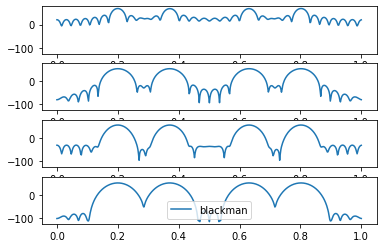

In [323]:
transformation(32)

<Figure size 1440x432 with 0 Axes>

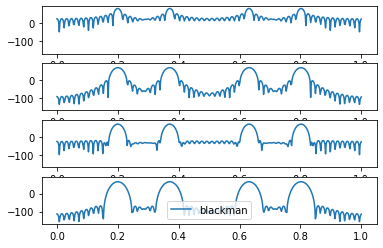

In [324]:
transformation(64)

     Selon la largeur du lobe et dans les 4 cas c'est la fenêtre rectangulaire que nous devons prendre.